In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

<font size= 5>1. 数据清洗和理解</font>


In [2]:
df_raw = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df_store = pd.read_csv('./data/store.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
display(df_raw.head(5))
display(df_raw.tail(5))
display(df_test.head(5))
display(df_store.head(5))

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
print('there are {} rows in train data'.format(df_raw.shape[0]))
print('there are {} rows in test data'.format(df_test.shape[0]))
print('there are {} rows in store data'.format(df_store.shape[0]))

there are 1017209 rows in train data
there are 41088 rows in test data
there are 1115 rows in store data


Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

- Store - a unique Id for each store
- Sales - the turnover for any given day (this is what you are predicting)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

- Promo - indicates whether a store is running a promo on that day

What below are in the supplement file.

- Id - an Id that represents a (Store, Date) duple within the test set
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

Our dependent variable is Sales which would be the prediction target.

In [5]:
df_raw.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

 看起来原始数据中所有特征都没有缺失值

In [6]:
df_raw.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
for col in ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']:
    print(df_raw[col].value_counts())

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64
1    844392
0    172817
Name: Open, dtype: int64
0    629129
1    388080
Name: Promo, dtype: int64
0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
0    835488
1    181721
Name: SchoolHoliday, dtype: int64


In [9]:
print(df_raw[df_raw['StateHoliday'] == 0].count())
print(df_raw[df_raw['StateHoliday'] == '0'].count())

Store            131072
DayOfWeek        131072
Date             131072
Sales            131072
Customers        131072
Open             131072
Promo            131072
StateHoliday     131072
SchoolHoliday    131072
dtype: int64
Store            855087
DayOfWeek        855087
Date             855087
Sales            855087
Customers        855087
Open             855087
Promo            855087
StateHoliday     855087
SchoolHoliday    855087
dtype: int64


StateHoliday特征中的0有的是字符型，有的是文本型。全部替换掉为文本型

In [10]:
import copy

df_train = df_raw.copy()

In [11]:
print(df_train[df_train['StateHoliday'] == 0].count())
print(df_train[df_train['StateHoliday'] == '0'].count())

df_train['StateHoliday'].replace(0,'0',inplace = True)

print(df_train[df_train['StateHoliday'] == 0].count())
print(df_train[df_train['StateHoliday'] == '0'].count())

Store            131072
DayOfWeek        131072
Date             131072
Sales            131072
Customers        131072
Open             131072
Promo            131072
StateHoliday     131072
SchoolHoliday    131072
dtype: int64
Store            855087
DayOfWeek        855087
Date             855087
Sales            855087
Customers        855087
Open             855087
Promo            855087
StateHoliday     855087
SchoolHoliday    855087
dtype: int64
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Store            986159
DayOfWeek        986159
Date             986159
Sales            986159
Customers        986159
Open             986159
Promo            986159
StateHoliday     986159
SchoolHoliday    986159
dtype: int64


将日期列转换为dt类型并提取年份和月份

In [12]:
df_train['Date_dt'] = pd.to_datetime(df_raw['Date'].astype(str))

In [13]:
df_train['year'] = df_train['Date_dt'].dt.year
df_train['month'] = df_train['Date_dt'].dt.month

In [14]:
display(df_train.head(5))
display(df_train.tail(5))

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_dt,year,month
0,1,5,2015-07-31,5263,555,1,1,0,1,2015-07-31,2015,7
1,2,5,2015-07-31,6064,625,1,1,0,1,2015-07-31,2015,7
2,3,5,2015-07-31,8314,821,1,1,0,1,2015-07-31,2015,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015-07-31,2015,7
4,5,5,2015-07-31,4822,559,1,1,0,1,2015-07-31,2015,7


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_dt,year,month
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013-01-01,2013,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013-01-01,2013,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013-01-01,2013,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013-01-01,2013,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1,2013-01-01,2013,1


In [15]:
import calendar

df_train['month'] = df_train['month'].apply(lambda x: calendar.month_abbr[x])

In [16]:
display(df_train.head(5))
display(df_train.tail(5))

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_dt,year,month
0,1,5,2015-07-31,5263,555,1,1,0,1,2015-07-31,2015,Jul
1,2,5,2015-07-31,6064,625,1,1,0,1,2015-07-31,2015,Jul
2,3,5,2015-07-31,8314,821,1,1,0,1,2015-07-31,2015,Jul
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015-07-31,2015,Jul
4,5,5,2015-07-31,4822,559,1,1,0,1,2015-07-31,2015,Jul


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_dt,year,month
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013-01-01,2013,Jan
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013-01-01,2013,Jan
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013-01-01,2013,Jan
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013-01-01,2013,Jan
1017208,1115,2,2013-01-01,0,0,0,0,a,1,2013-01-01,2013,Jan


<font size = 5>2. EDA</font>

In [17]:
min_date = min(df_train['Date_dt'])
max_date = max(df_train['Date_dt'])
range_date = max_date - min_date 

print('The train data covers {} days. The first day is {} and the last day is {}'.format(range_date.days,min_date,max_date))

The train data covers 941 days. The first day is 2013-01-01 00:00:00 and the last day is 2015-07-31 00:00:00


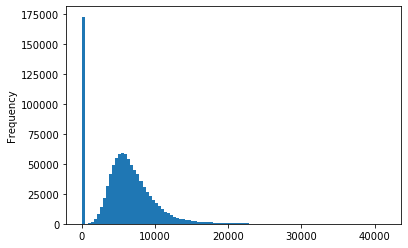

In [42]:
df_train['Sales'].plot(kind = 'hist',bins = 100)

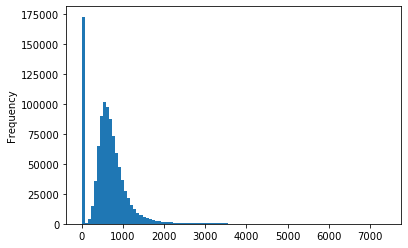

In [40]:
df_train['Customers'].plot(kind = 'hist',bins = 100)

In [56]:
df_train['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

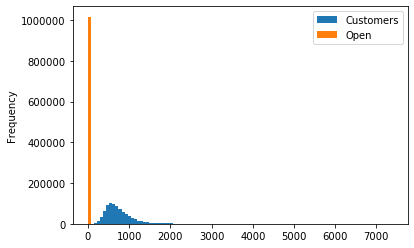

In [57]:
df_train[['Customers','Open']].plot(kind = 'hist',bins = 100)

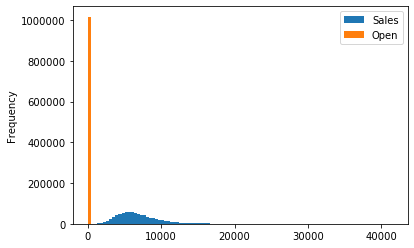

In [58]:
df_train[['Sales','Open']].plot(kind = 'hist',bins = 100)

In [59]:
df_train[(df_train['Open'] == 0) & (df_train['Sales'] != 0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_dt,year,month


In [62]:
df_train[(df_train['Open'] == 0) & (df_train['Customers'] != 0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_dt,year,month


In [66]:
display(df_train[(df_train['Open'] == 1) & (df_train['Sales'] == 0)])
display(df_train[(df_train['Open'] == 1) & (df_train['Customers'] == 0)])

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_dt,year,month
86825,971,5,2015-05-15,0,0,1,0,0,1,2015-05-15,2015,May
142278,674,4,2015-03-26,0,0,1,0,0,0,2015-03-26,2015,Mar
196938,699,4,2015-02-05,0,0,1,1,0,0,2015-02-05,2015,Feb
322053,708,3,2014-10-01,0,0,1,1,0,0,2014-10-01,2014,Oct
330176,357,1,2014-09-22,0,0,1,0,0,0,2014-09-22,2014,Sep
340348,227,4,2014-09-11,0,0,1,0,0,0,2014-09-11,2014,Sep
340860,835,4,2014-09-11,0,0,1,0,0,0,2014-09-11,2014,Sep
341795,835,3,2014-09-10,0,0,1,0,0,0,2014-09-10,2014,Sep
346232,548,5,2014-09-05,0,0,1,1,0,1,2014-09-05,2014,Sep
346734,28,4,2014-09-04,0,0,1,1,0,0,2014-09-04,2014,Sep


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_dt,year,month
86825,971,5,2015-05-15,0,0,1,0,0,1,2015-05-15,2015,May
142278,674,4,2015-03-26,0,0,1,0,0,0,2015-03-26,2015,Mar
196938,699,4,2015-02-05,0,0,1,1,0,0,2015-02-05,2015,Feb
322053,708,3,2014-10-01,0,0,1,1,0,0,2014-10-01,2014,Oct
330176,357,1,2014-09-22,0,0,1,0,0,0,2014-09-22,2014,Sep
340348,227,4,2014-09-11,0,0,1,0,0,0,2014-09-11,2014,Sep
340860,835,4,2014-09-11,0,0,1,0,0,0,2014-09-11,2014,Sep
341795,835,3,2014-09-10,0,0,1,0,0,0,2014-09-10,2014,Sep
346232,548,5,2014-09-05,0,0,1,1,0,1,2014-09-05,2014,Sep
346734,28,4,2014-09-04,0,0,1,1,0,0,2014-09-04,2014,Sep


看起来如果未开业的话销售和顾客都是0，没有例外。但是存在开了门销售和顾客为0的情况。这样的话可以把未开门的记录都去掉，使得分布正常一点。然后把剩余的销售0的增加1作为虚记录，方便进行对数转换。

In [71]:
df_train = df_train[df_train['Open'] != 0]

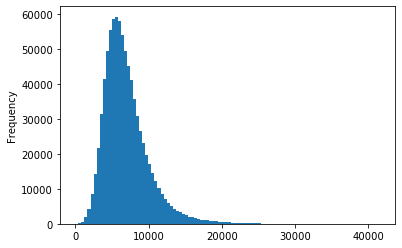

In [77]:
df_train['Sales'].plot(kind = 'hist',bins = 100)

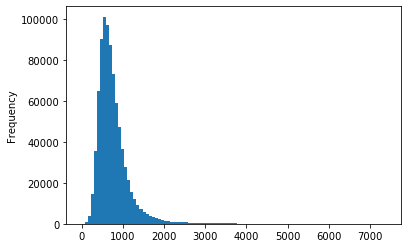

In [78]:
df_train['Customers'].plot(kind = 'hist',bins = 100)

In [81]:
df_train['Customers'] = df_train['Customers'].astype('int64')
df_train['Customers'].describe()

count    844392.000000
mean        762.728395
std         401.227674
min           0.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

In [83]:
df_train[df_train['Customers'] >= 900][:5]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_dt,year,month
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015-07-31,2015,Jul
6,7,5,2015-07-31,15344,1414,1,1,0,1,2015-07-31,2015,Jul
10,11,5,2015-07-31,10457,1236,1,1,0,1,2015-07-31,2015,Jul
11,12,5,2015-07-31,8959,962,1,1,0,1,2015-07-31,2015,Jul
15,16,5,2015-07-31,10231,979,1,1,0,1,2015-07-31,2015,Jul


<font size = 5>3. 特征处理</font>

In [84]:
df_train['Customers_group'] = pd.cut(df_train['Customers'], bins = [0,500,700,900,7400], labels = ['0-500','500-700','700-900','900-7400'])

In [99]:
df_train['Customers_group'].value_counts()

500-700     266641
900-7400    205646
0-500       186205
700-900     185848
Name: Customers_group, dtype: int64

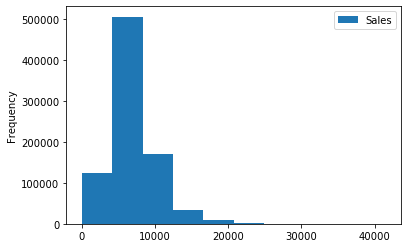

In [91]:
df_train[['Sales','Customers_group']].plot(kind = 'hist')

将train表几个目录型变量独热编码化

In [219]:
df_train = pd.get_dummies(data = df_train , columns = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday'])

display(df_train.head(5))
display(df_train.tail(5))

,Store,Date,Sales,Customers,Date_dt,year,month,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,...,Open_0,Open_1,Promo_0,Promo_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_0,SchoolHoliday_1
0,1,2015-07-31,5263,555,2015-07-31,2015,Jul,0,0,0,...,0,1,0,1,1,0,0,0,0,1
1,2,2015-07-31,6064,625,2015-07-31,2015,Jul,0,0,0,...,0,1,0,1,1,0,0,0,0,1
2,3,2015-07-31,8314,821,2015-07-31,2015,Jul,0,0,0,...,0,1,0,1,1,0,0,0,0,1
3,4,2015-07-31,13995,1498,2015-07-31,2015,Jul,0,0,0,...,0,1,0,1,1,0,0,0,0,1
4,5,2015-07-31,4822,559,2015-07-31,2015,Jul,0,0,0,...,0,1,0,1,1,0,0,0,0,1


,Store,Date,Sales,Customers,Date_dt,year,month,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,...,Open_0,Open_1,Promo_0,Promo_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_0,SchoolHoliday_1
1017204,1111,2013-01-01,0,0,2013-01-01,2013,Jan,0,1,0,...,1,0,1,0,0,1,0,0,0,1
1017205,1112,2013-01-01,0,0,2013-01-01,2013,Jan,0,1,0,...,1,0,1,0,0,1,0,0,0,1
1017206,1113,2013-01-01,0,0,2013-01-01,2013,Jan,0,1,0,...,1,0,1,0,0,1,0,0,0,1
1017207,1114,2013-01-01,0,0,2013-01-01,2013,Jan,0,1,0,...,1,0,1,0,0,1,0,0,0,1
1017208,1115,2013-01-01,0,0,2013-01-01,2013,Jan,0,1,0,...,1,0,1,0,0,1,0,0,0,1


开始处理store表

In [100]:
store_dummies_interval = pd.get_dummies(df_store['PromoInterval'].str.split(',', expand=True),prefix = 'PromoInterval')
display(stor_dummies_interval.head(5))
print(test_dummies_interval.columns.get_values())

,PromoInterval_Feb,PromoInterval_Jan,PromoInterval_Mar,PromoInterval_Apr,PromoInterval_Jun,PromoInterval_May,PromoInterval_Aug,PromoInterval_Jul,PromoInterval_Sept,PromoInterval_Dec,PromoInterval_Nov,PromoInterval_Oct
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,1,0,0,0,1
2,0,1,0,1,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


['PromoInterval_Feb' 'PromoInterval_Jan' 'PromoInterval_Mar'
 'PromoInterval_Apr' 'PromoInterval_Jun' 'PromoInterval_May'
 'PromoInterval_Aug' 'PromoInterval_Jul' 'PromoInterval_Sept'
 'PromoInterval_Dec' 'PromoInterval_Nov' 'PromoInterval_Oct']


PromoInterval的值其实有四种模式而且互相不重叠，所以直接独热化后就正好生成了12个对应月份的特征

In [82]:
df_store = pd.concat([df_store,test_dummies_interval],axis = 1)

In [228]:
df_store.info()
display(df_store.head(5))
display(df_store.tail(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


将CompetitionOpenSinceMonth和CompetitionOpenSinceYear合成datetime并和train的Date_dt做差形成月份数。
同理处理Promo2SinceWeek和Promo2SinceYear。但是要转换成月份并做差，同时
现在问题是对于这些nan的如何处理。不知道比较大的值影响更大还是更小的值影响更大。

In [103]:
pd.merge(df_train, df_store, on = 'Store')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_dt,...,Customers_group,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015-07-31,...,500-700,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,2015-07-30,...,500-700,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,2015-07-29,...,500-700,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,2015-07-28,...,500-700,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,2015-07-27,...,500-700,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,6,2015-07-25,4364,500,1,0,0,0,2015-07-25,...,0-500,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,5,2015-07-24,3706,459,1,0,0,0,2015-07-24,...,0-500,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,4,2015-07-23,3769,503,1,0,0,0,2015-07-23,...,500-700,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,3,2015-07-22,3464,463,1,0,0,0,2015-07-22,...,0-500,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,2,2015-07-21,3558,469,1,0,0,0,2015-07-21,...,0-500,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


<font size = 5>4. 使用线性回归建立基准值</font>